In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

## Section 1: Available Data

In [10]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define functions.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
data = read_csv('data.csv')

In [63]:
data.query('Study=="2017mkrtchian"').groupby('Diagnosis').Subject.nunique()

Diagnosis
Anxious    42
Healthy    56
Name: Subject, dtype: int64

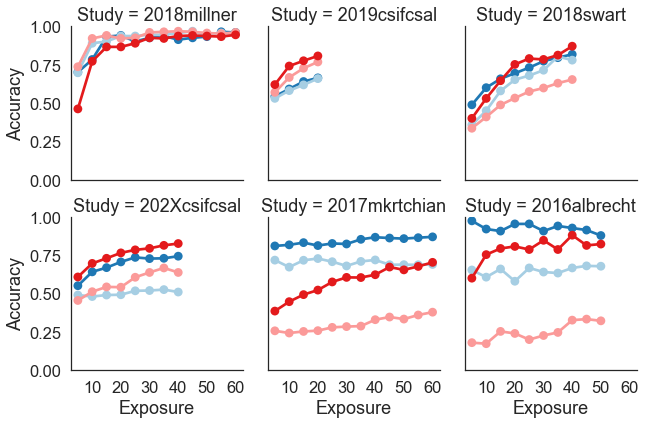

In [57]:
gb = data.groupby(['Study','Valence','Action','Exposure']).Accuracy.mean().reset_index()
gb['Cue'] = gb.apply(lambda x: f'{x.Action}-{x.Valence}', 1)
gb['Cue'] = gb.Cue.replace({'Go-Win':'GW', 'No-Go-Win':'NGW', 'Go-Lose':'GAL', 'No-Go-Lose':'NGAL'})
gb['Exposure'] = (gb['Exposure'] - 1) // 5


col_order = ['2018millner','2019csifcsal','2018swart','202Xcsifcsal','2017mkrtchian','2016albrecht']
palette = ['#1f78b4','#a6cee3','#fb9a99', '#e31a1c']

g = sns.FacetGrid(gb, col='Study', col_order=col_order, col_wrap=3)
g.map(sns.pointplot, 'Exposure', 'Accuracy', 'Cue', palette=palette, 
      hue_order=['GW','GAL','NGW','NGAL'], order=np.arange(12), ci=None)
g.set(xticks=np.arange(1,12,2), xticklabels=np.arange(10,65,10), ylim=(0,1))

In [60]:
data.query('Study=="2018swart"').Cue.unique()

array([2, 6, 7, 1, 5, 4, 3, 8])

In [ ]:
data = read_csv('data.csv')
gb = data.groupby(['Study','Subject','Valence','Action']).Accuracy.mean().reset_index()
gb['Cue'] = gb.apply(lambda x: f'{x.Action} to {x.Valence}', 1)
# gb = gb.pivot_table(index=('Study','Subject'), columns='Cue', values='Accuracy').reset_index()

fig, axes = plt.subplots(2,4,figsize=(12,4))

for i, cue in enumerate(col_order):
    
    ## Plot stripplot.
    sns.stripplot('Accuracy','Study',data=gb.query(f'Cue=="{cue}"'),order=row_order,ax=axes[1,i])
    axes[1,i].set(xlim=(0,1), yticks=[], ylabel='')
    axes[1,i].invert_xaxis()
    
    for j, study in enumerate(row_order):        
        acc = gb.query(f'Study=="{study}" and Cue=="{cue}"').Accuracy        
        axes[0,i].hist(acc, bins=np.linspace(0,1,21), histtype='step', density=True, cumulative=-1)
        if j: axes[0,i].set(yticks=[])
        
    axes[0,i].set(xlim=(0,1), xticks=[], title=cue)
    axes[0,i].invert_xaxis()
        
        
sns.despine()
plt.tight_layout()